In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [10]:
df = pd.read_csv('treino_sinais_vitais_com_label.txt')

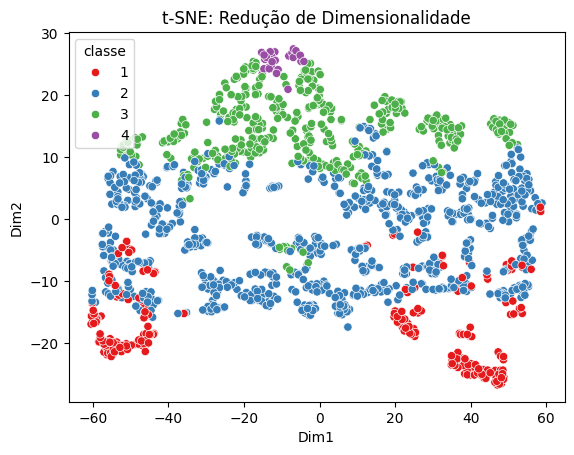

In [11]:

# Selecione as colunas que serão usadas para o t-SNE
X = df[['si1', 'si2', 'qpa', 'pulso', 'resp', 'grav']]

# Crie um modelo t-SNE e ajuste ao dataset
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Crie um DataFrame com as coordenadas do t-SNE e as classes
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['classe'] = df['classe']

# Plote o gráfico de dispersão
sns.scatterplot(x='Dim1', y='Dim2', hue='classe', data=df_tsne, palette='Set1')
plt.title('t-SNE: Redução de Dimensionalidade')
plt.show()


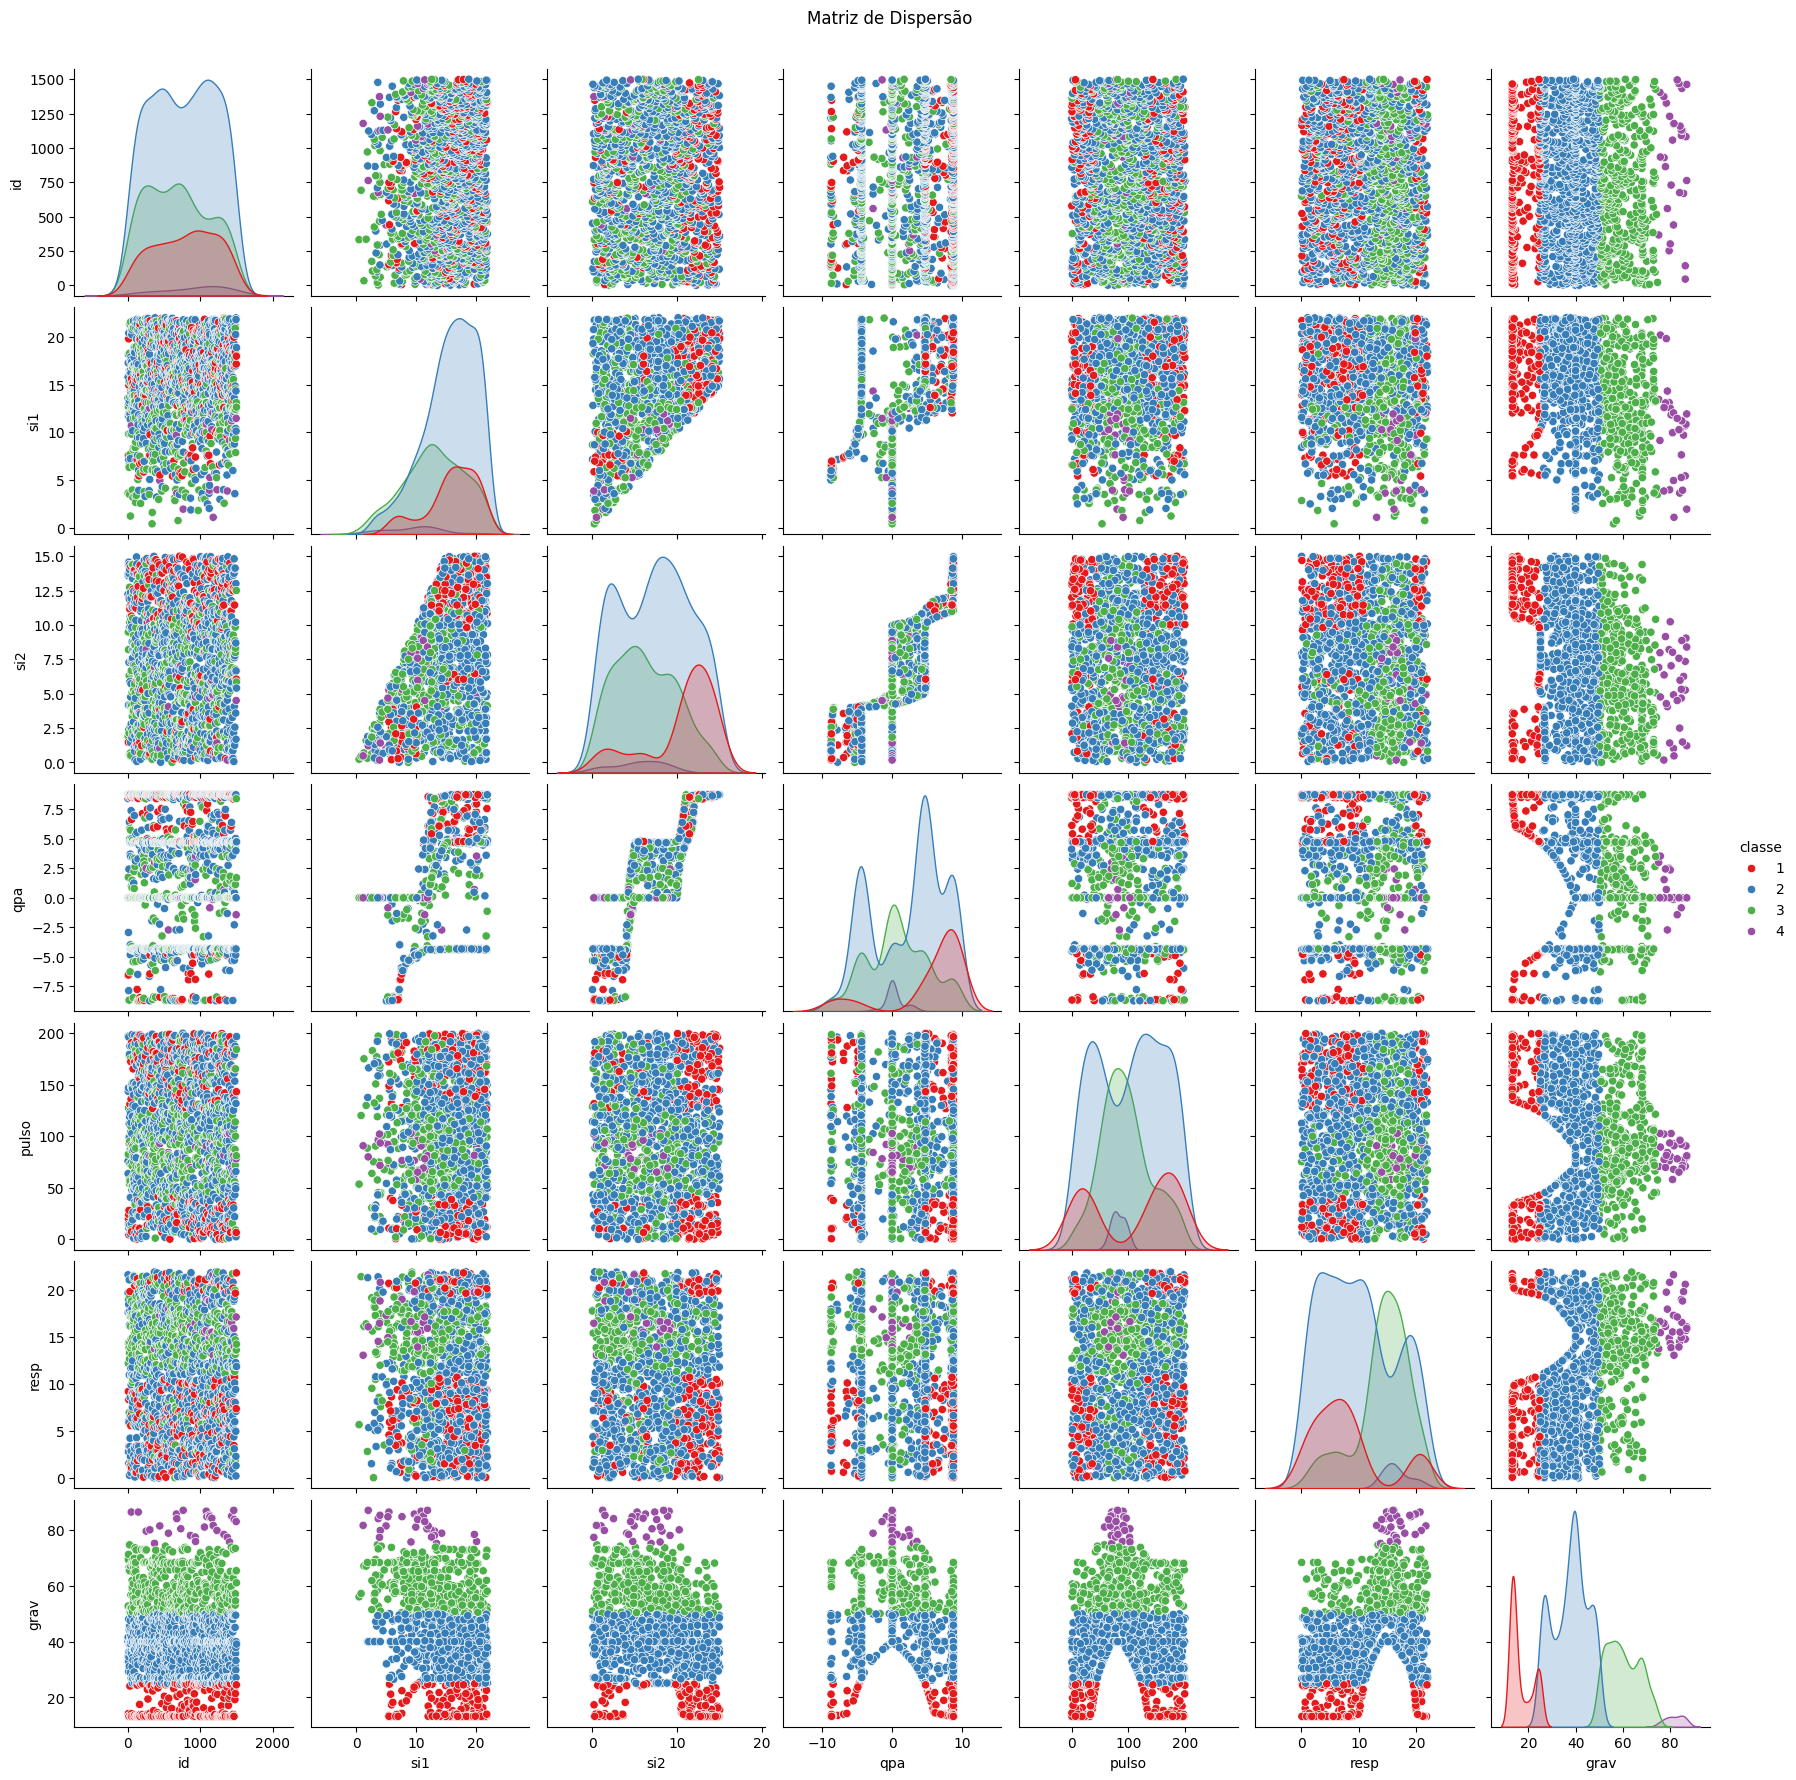

In [12]:
sns.pairplot(df, hue='classe', palette='Set1')
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

<Figure size 1000x800 with 0 Axes>

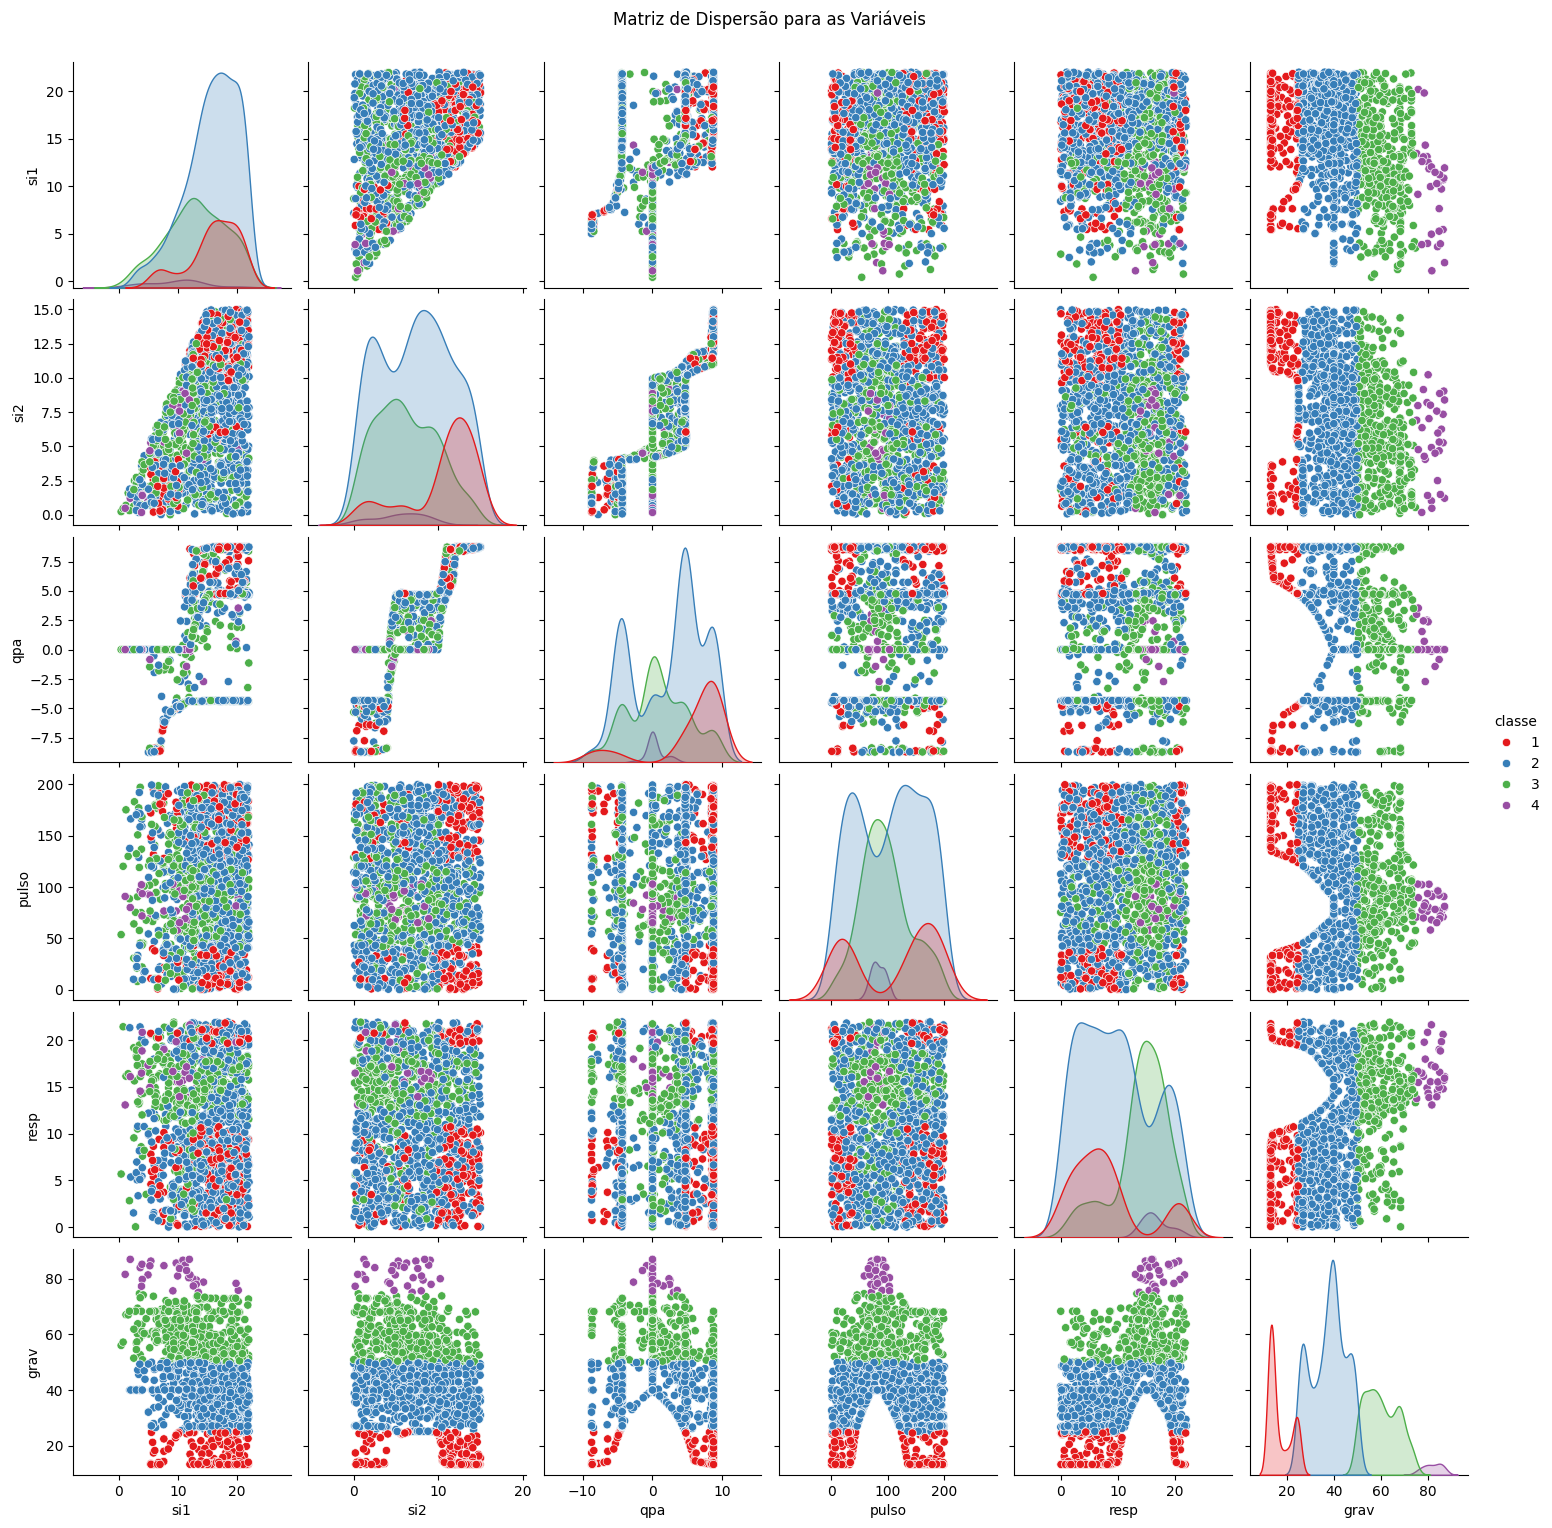

C:\Users\yasmi\AppData\Local\Temp\ipykernel_12832\1684962353.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, palette='Set2')


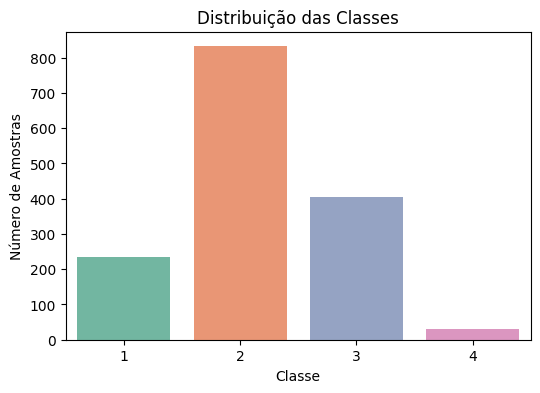

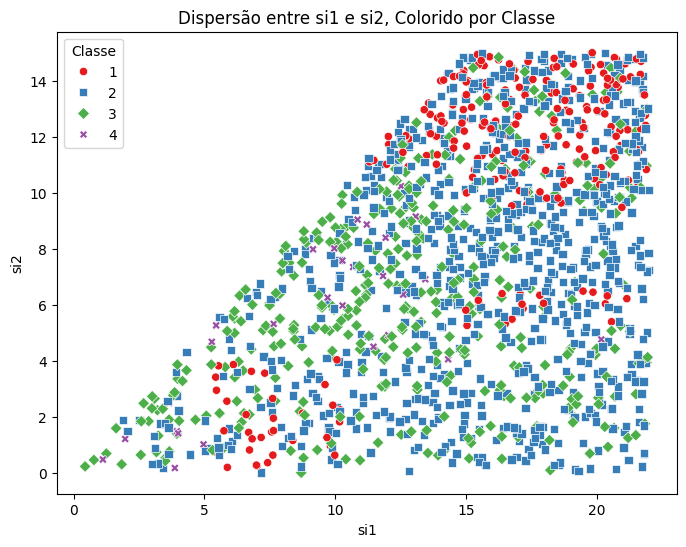

C:\Users\yasmi\AppData\Local\Temp\ipykernel_12832\1684962353.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y='si1', data=df, palette='Set2')


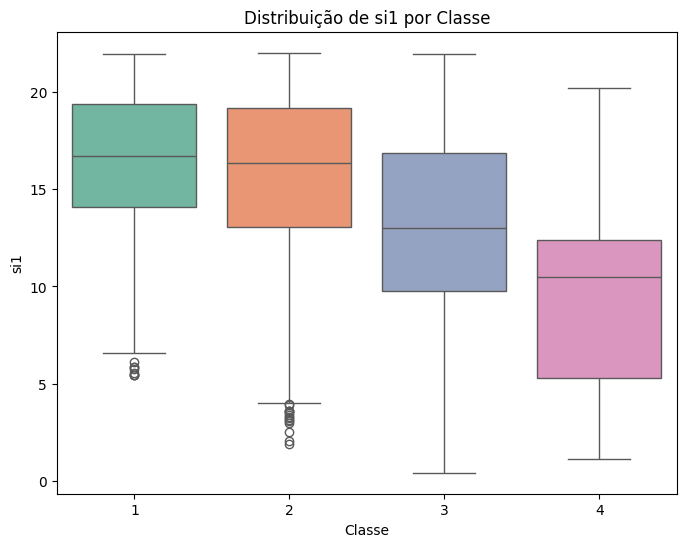

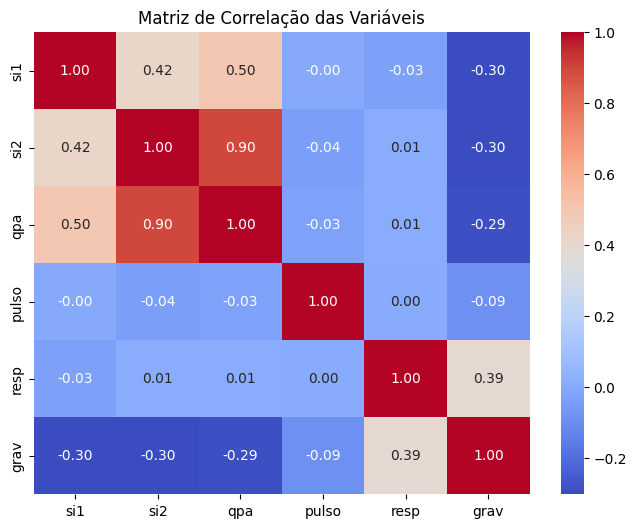

In [13]:
# Vamos focar nas variáveis de entrada (si1, si2, qpa, etc.) e nas classes.
features = ['si1', 'si2', 'qpa', 'pulso', 'resp', 'grav']
target = 'classe'

# Adicionando um gráfico para comparar as variáveis com base nas classes.
plt.figure(figsize=(10, 8))

# Vamos usar um Pairplot para ver a relação entre todas as variáveis e as classes
sns.pairplot(df, hue=target, palette="Set1", vars=features)
plt.suptitle("Matriz de Dispersão para as Variáveis", y=1.02)
plt.show()

# Agora, plotando a distribuição das classes
plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=df, palette='Set2')
plt.title("Distribuição das Classes")
plt.xlabel("Classe")
plt.ylabel("Número de Amostras")
plt.show()

# Para realizar um gráfico de dispersão 2D entre 'si1' e 'si2', colorido por classe
plt.figure(figsize=(8, 6))
sns.scatterplot(x='si1', y='si2', hue=target, data=df, palette='Set1', style=target, markers=["o", "s", "D", "X"])
plt.title('Dispersão entre si1 e si2, Colorido por Classe')
plt.xlabel('si1')
plt.ylabel('si2')
plt.legend(title="Classe")
plt.show()

# Plot de um Boxplot para observar a distribuição de 'si1' entre as classes
plt.figure(figsize=(8, 6))
sns.boxplot(x=target, y='si1', data=df, palette='Set2')
plt.title('Distribuição de si1 por Classe')
plt.xlabel('Classe')
plt.ylabel('si1')
plt.show()

# Gerar um gráfico de correlação entre as variáveis numéricas
corr = df[features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis')
plt.show()
